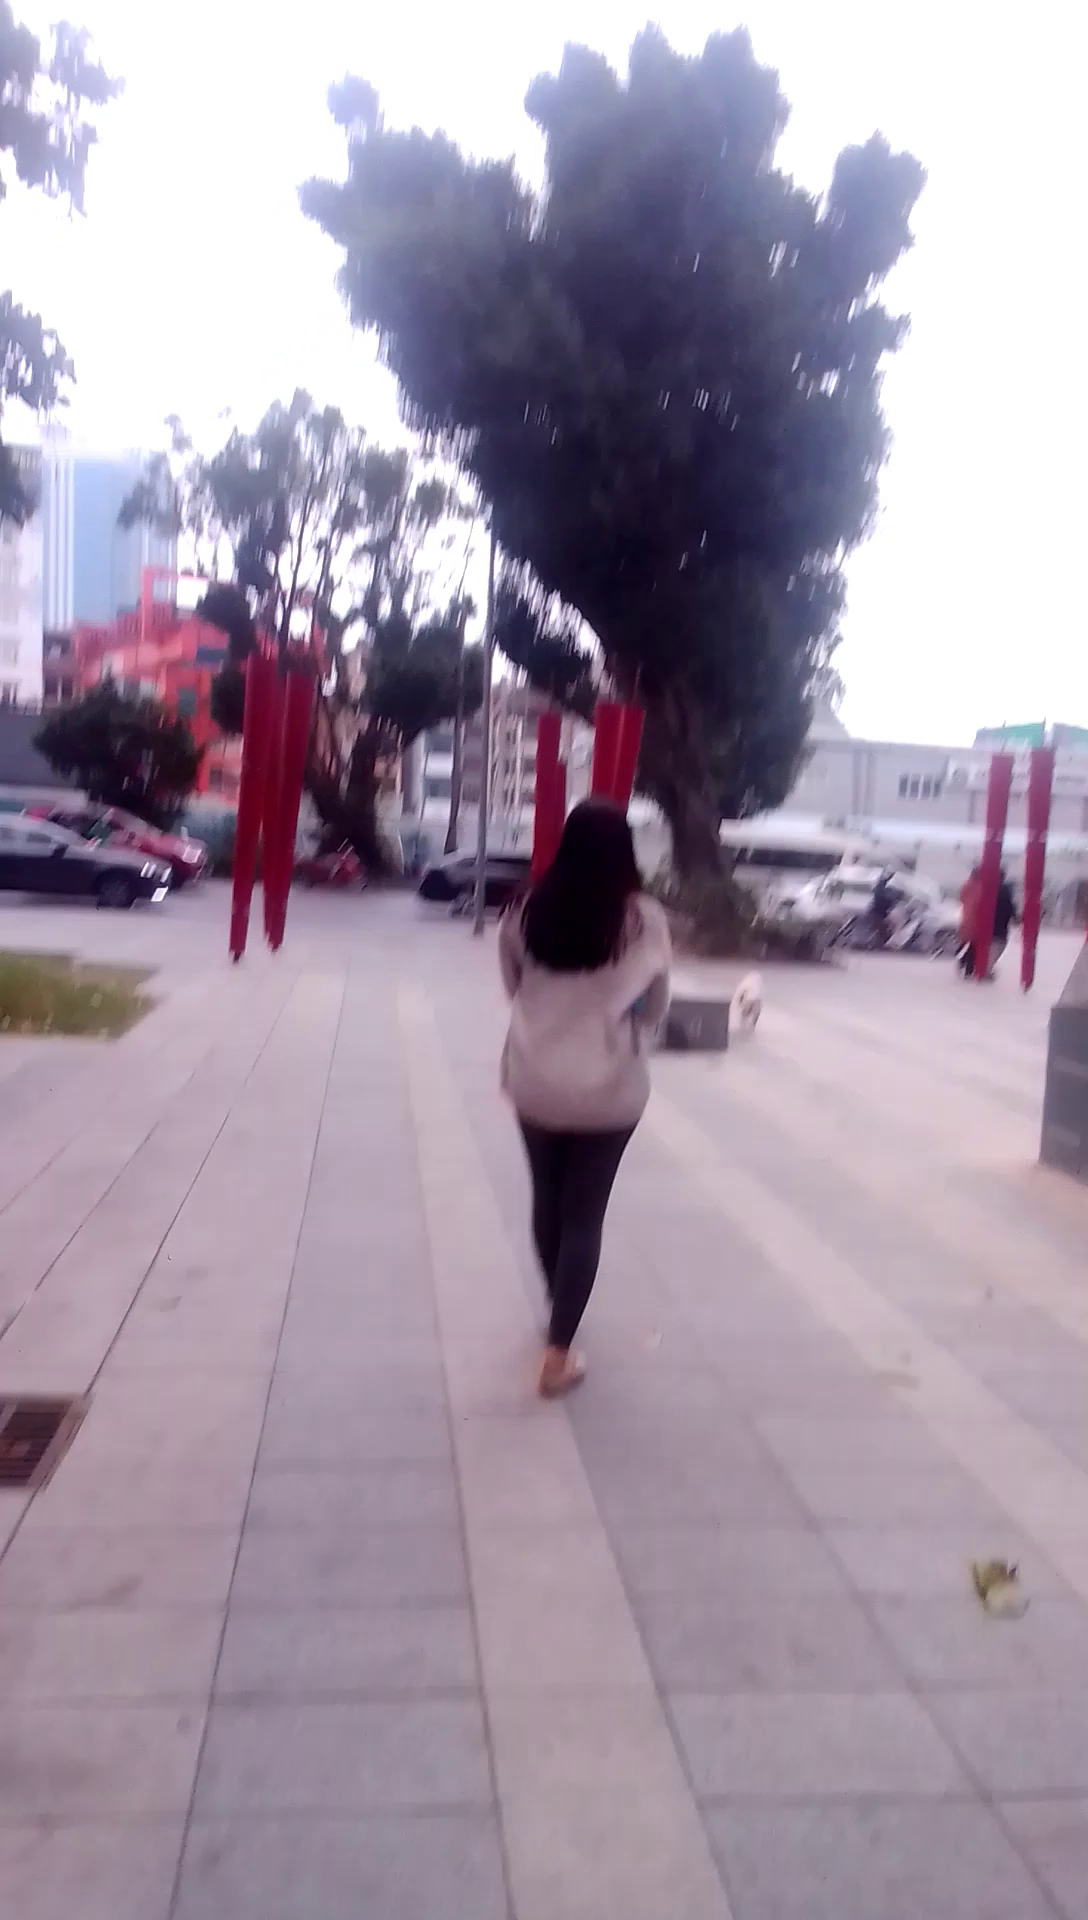

In [1]:
from body_matrix import infer
from body_matrix import load
from body_matrix import process
from body_matrix import measure
from body_matrix import draw

video, frame_counts, fps, sample_frame = load.video(
    "/Users/troydo42/Desktop/Raw_Vids/286021.mp4",
    -90, 
    75
)

sample_frame

In [2]:
keypoints_model, keypoints_transform = load.keypoints_model("cpu")
segment_model, segment_transform = load.segment_model("cpu")

selected_box, keypoints = infer.detect_main_target(
	sample_frame, "cpu", 0.85, keypoints_model, keypoints_transform
)
selected_kps = process.keypoints_filter(
    ['left_hip', 'right_hip', 'left_wrist', 'right_wrist'], 
    keypoints
)

mask, mask_image, bool_mask = infer.segment_selected_target(
	sample_frame, "cpu", selected_box, 0.99, segment_model, segment_transform
)

Found  1  person in the frame
Distances:  [40.19862365722656]
Areas:  [109208.48062090576]
FOCUSES:  [2716.7218846129126]
Select keypoint index 0
Found  2  person in the frame
[1.7176899909973145, 794.0059814453125, 205.93756103515625, 909.3790893554688]
[493.2629699707031, 798.897705078125, 675.13427734375, 1399.368896484375]
[495.3298034667969, 796.291259765625, 673.5670166015625, 1401.189208984375]
[493.2629699707031, 798.897705078125, 675.13427734375, 1399.368896484375]
[540.3547244452224, 0.46571926504457456]
0.46571926504457456 1


In [8]:
segment_area = process.segmentation_area(
	sample_frame, 
	bool_mask
)

tensor([ 795,  795,  795,  ..., 1399, 1399, 1399]) tensor([582, 583, 584,  ..., 563, 564, 565])


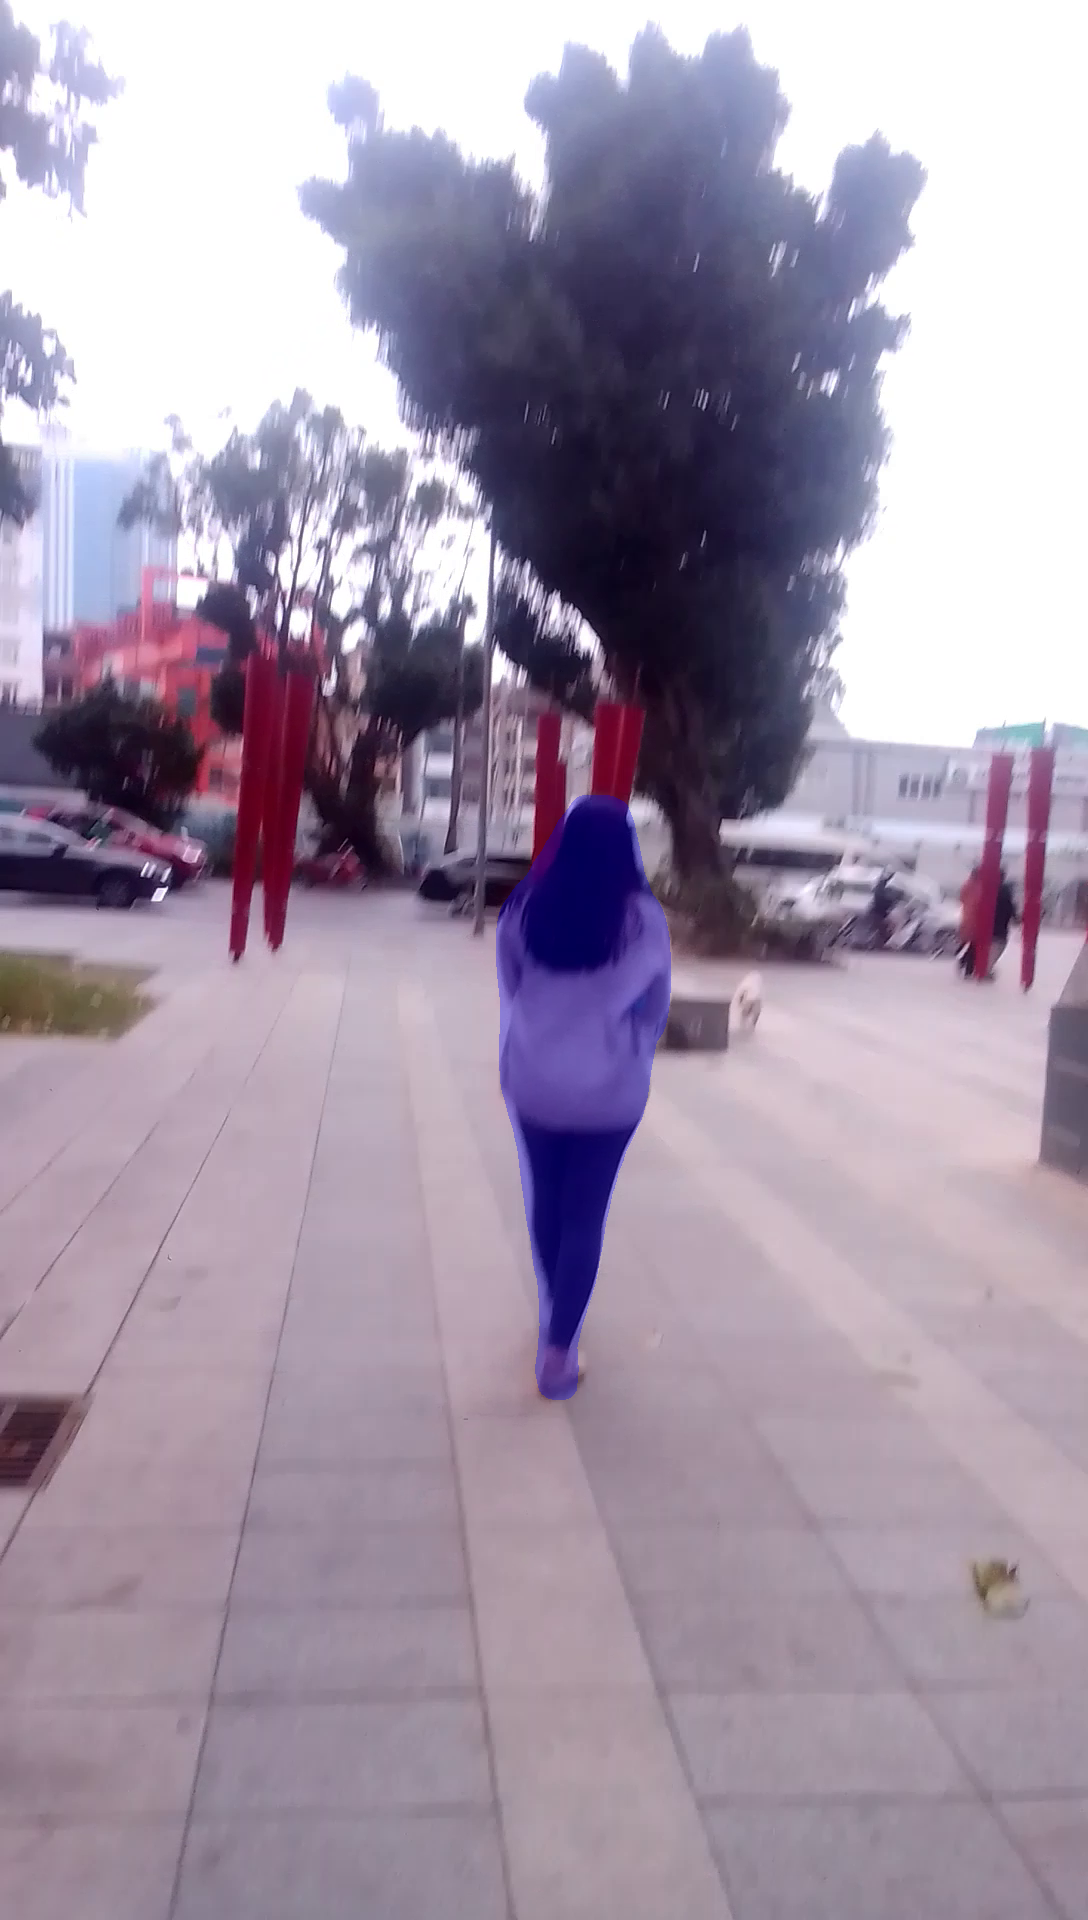

In [9]:
from torchvision.transforms.functional import pil_to_tensor, to_pil_image
from torchvision.utils import draw_segmentation_masks

segment_tensor_image = pil_to_tensor(sample_frame)
segment_mask_image = draw_segmentation_masks(
    segment_tensor_image, 
    bool_mask, 
    alpha=0.3, 
    colors=["blue"]    
)

segment_image = to_pil_image(segment_mask_image)
segment_image

In [10]:
selected_kps

{'left_wrist': [544.1010131835938, 1001.2147216796875],
 'right_wrist': [642.9130249023438, 1025.6943359375],
 'left_hip': [532.6445922851562, 1086.1734619140625],
 'right_hip': [609.9757080078125, 1097.6932373046875]}

left_wrist [544.1010131835938, 1001.2147216796875]
right_wrist [642.9130249023438, 1025.6943359375]
left_hip [532.6445922851562, 1086.1734619140625]
right_hip [609.9757080078125, 1097.6932373046875]


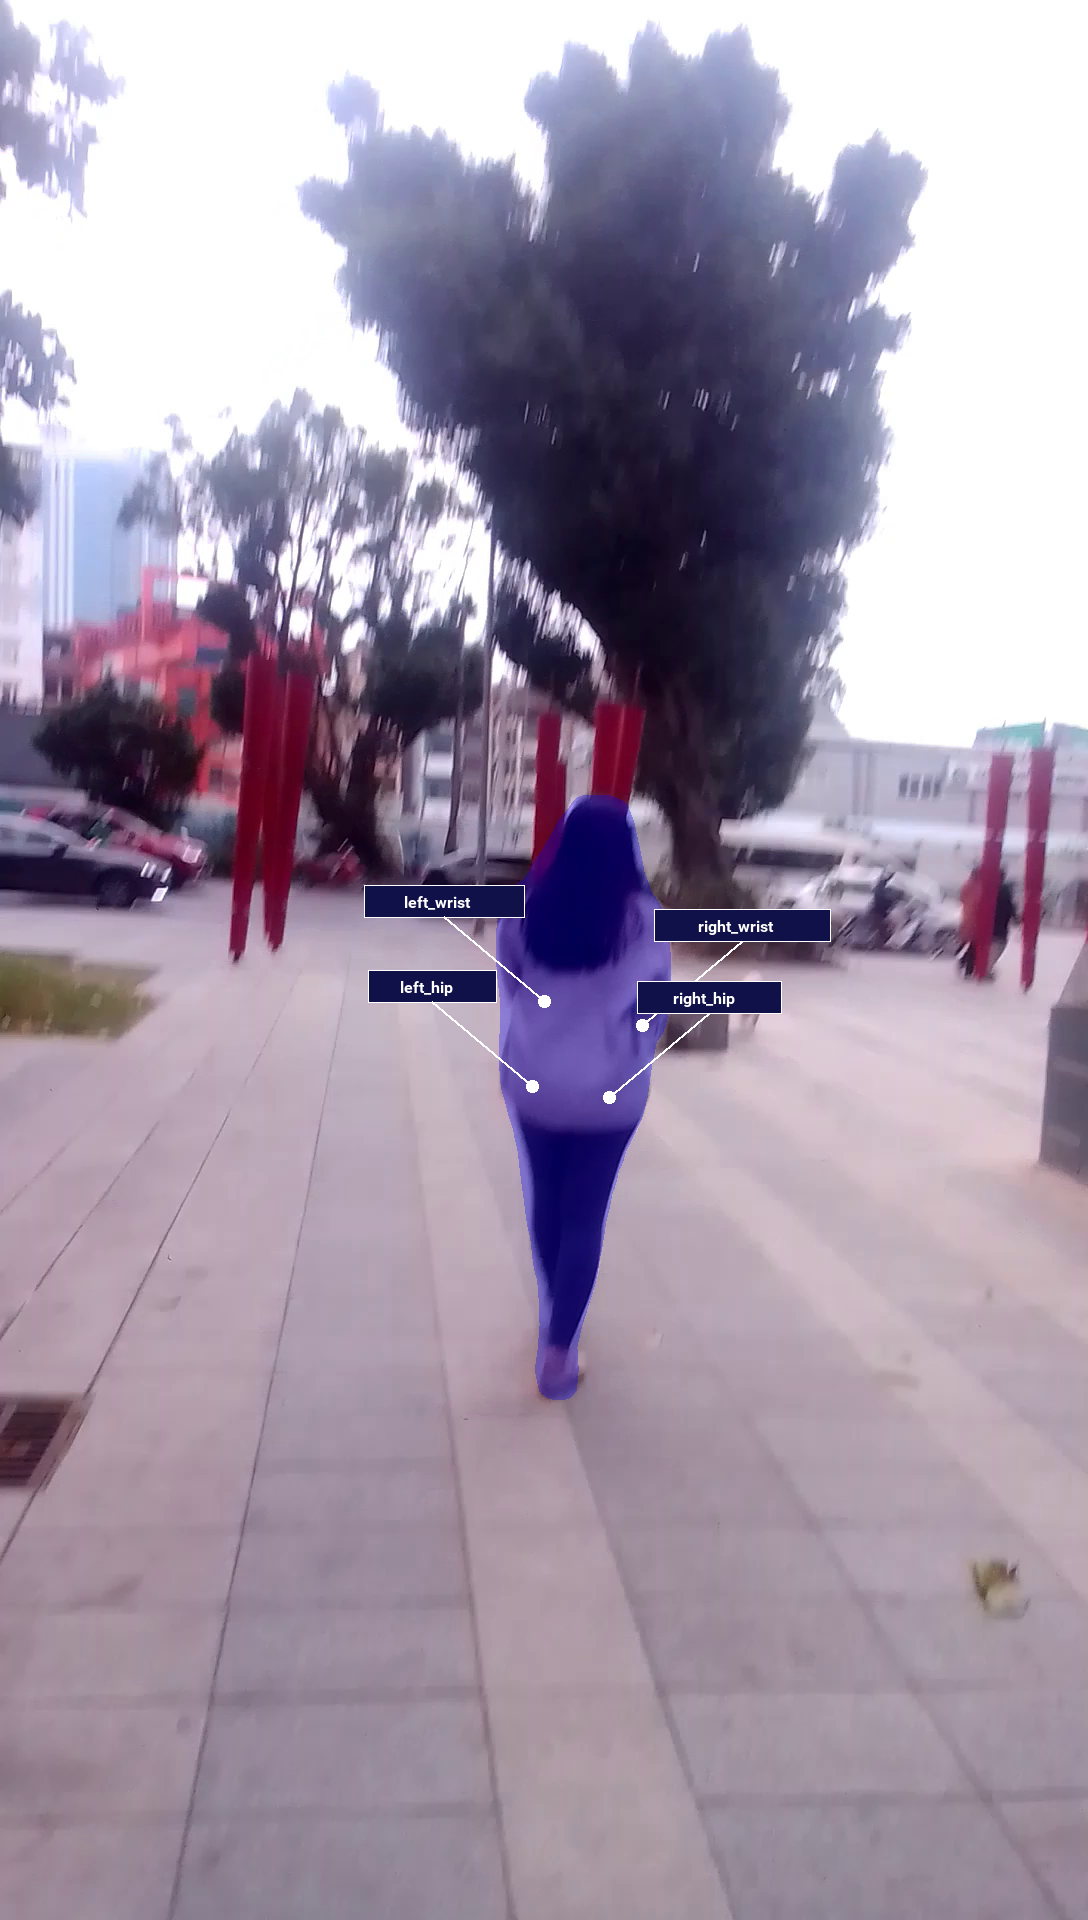

In [11]:
float_selected_frame = segment_image
middle_hip = measure.find_middle_point(
    selected_kps['left_hip'], 
    selected_kps['right_hip']
)

for key, value in selected_kps.items():
    print(key, value)
    
    float_selected_frame = draw.floating_rectangle_label(
        image = float_selected_frame, 
        longitude_coordinate = middle_hip[0], 
        point=value, 
        label_text=key, 
        label_size=16, 
        label_color="#ffffff", 
        label_font="/Users/troydo42/Desktop/Body_Matrixes/Roboto-Bold.ttf",
        background_color="#11114A"
    )
    
float_selected_frame

In [12]:
hip_kps = process.find_hip_points(
    selected_kps['left_hip'],
    selected_kps['right_hip'], 
    selected_kps['left_wrist'], 
    selected_kps['right_wrist'], 
    segment_area
)

print(hip_kps)

{'left_hip': (501, 1091), 'right_hip': (641, 1102)}


left_hip (501, 1091)
right_hip (641, 1102)


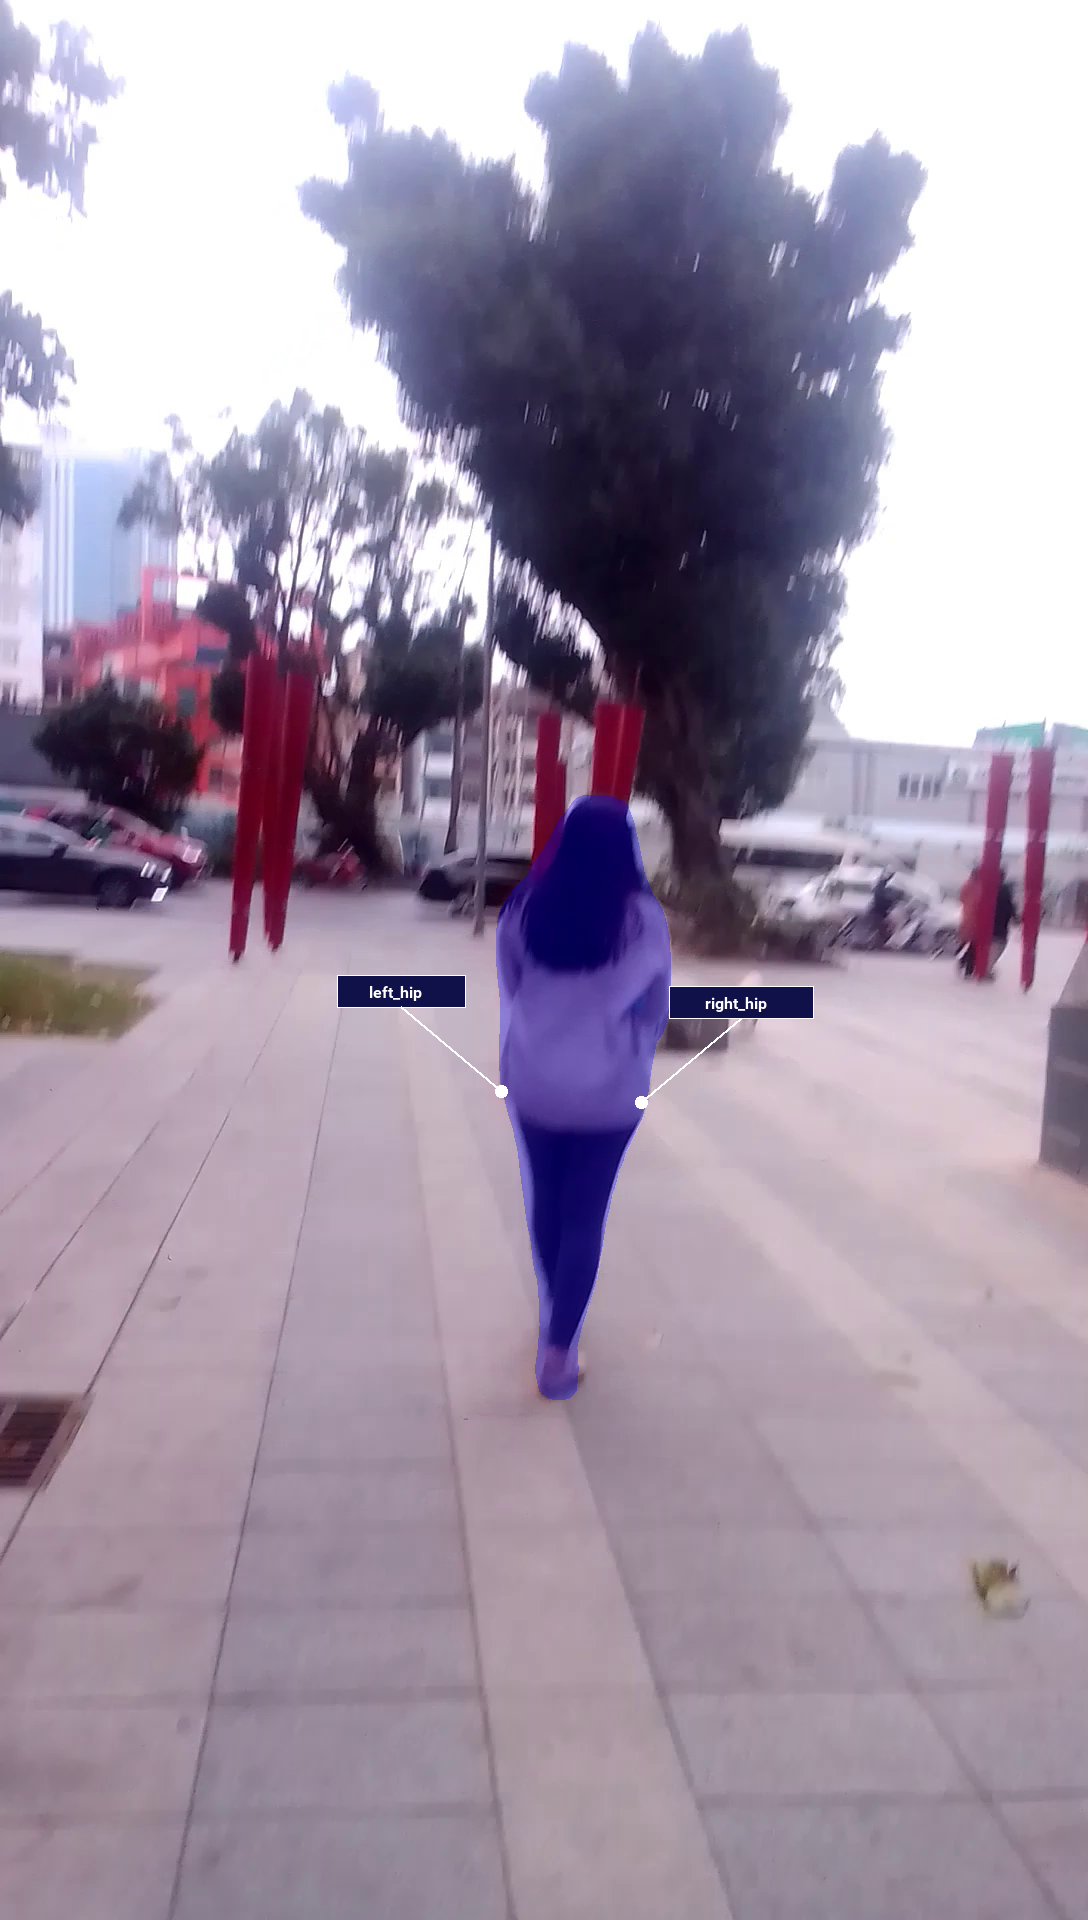

In [13]:
from body_matrix import measure
from body_matrix import draw

float_labeled_frame = segment_image
for key, value in hip_kps.items():
    print(key, value)
    float_labeled_frame = draw.floating_rectangle_label(
        image = float_labeled_frame, 
        longitude_coordinate = middle_hip[0], 
        point=value, 
        label_text=key, 
        label_size=16, 
        label_color="#ffffff", 
        label_font="/Users/troydo42/Desktop/Body_Matrixes/Roboto-Bold.ttf",
        background_color="#11114A"
    )    
        
        
float_labeled_frame 

In [14]:
contours = process.segmentation_contour(
    sample_frame, 
    bool_mask
)

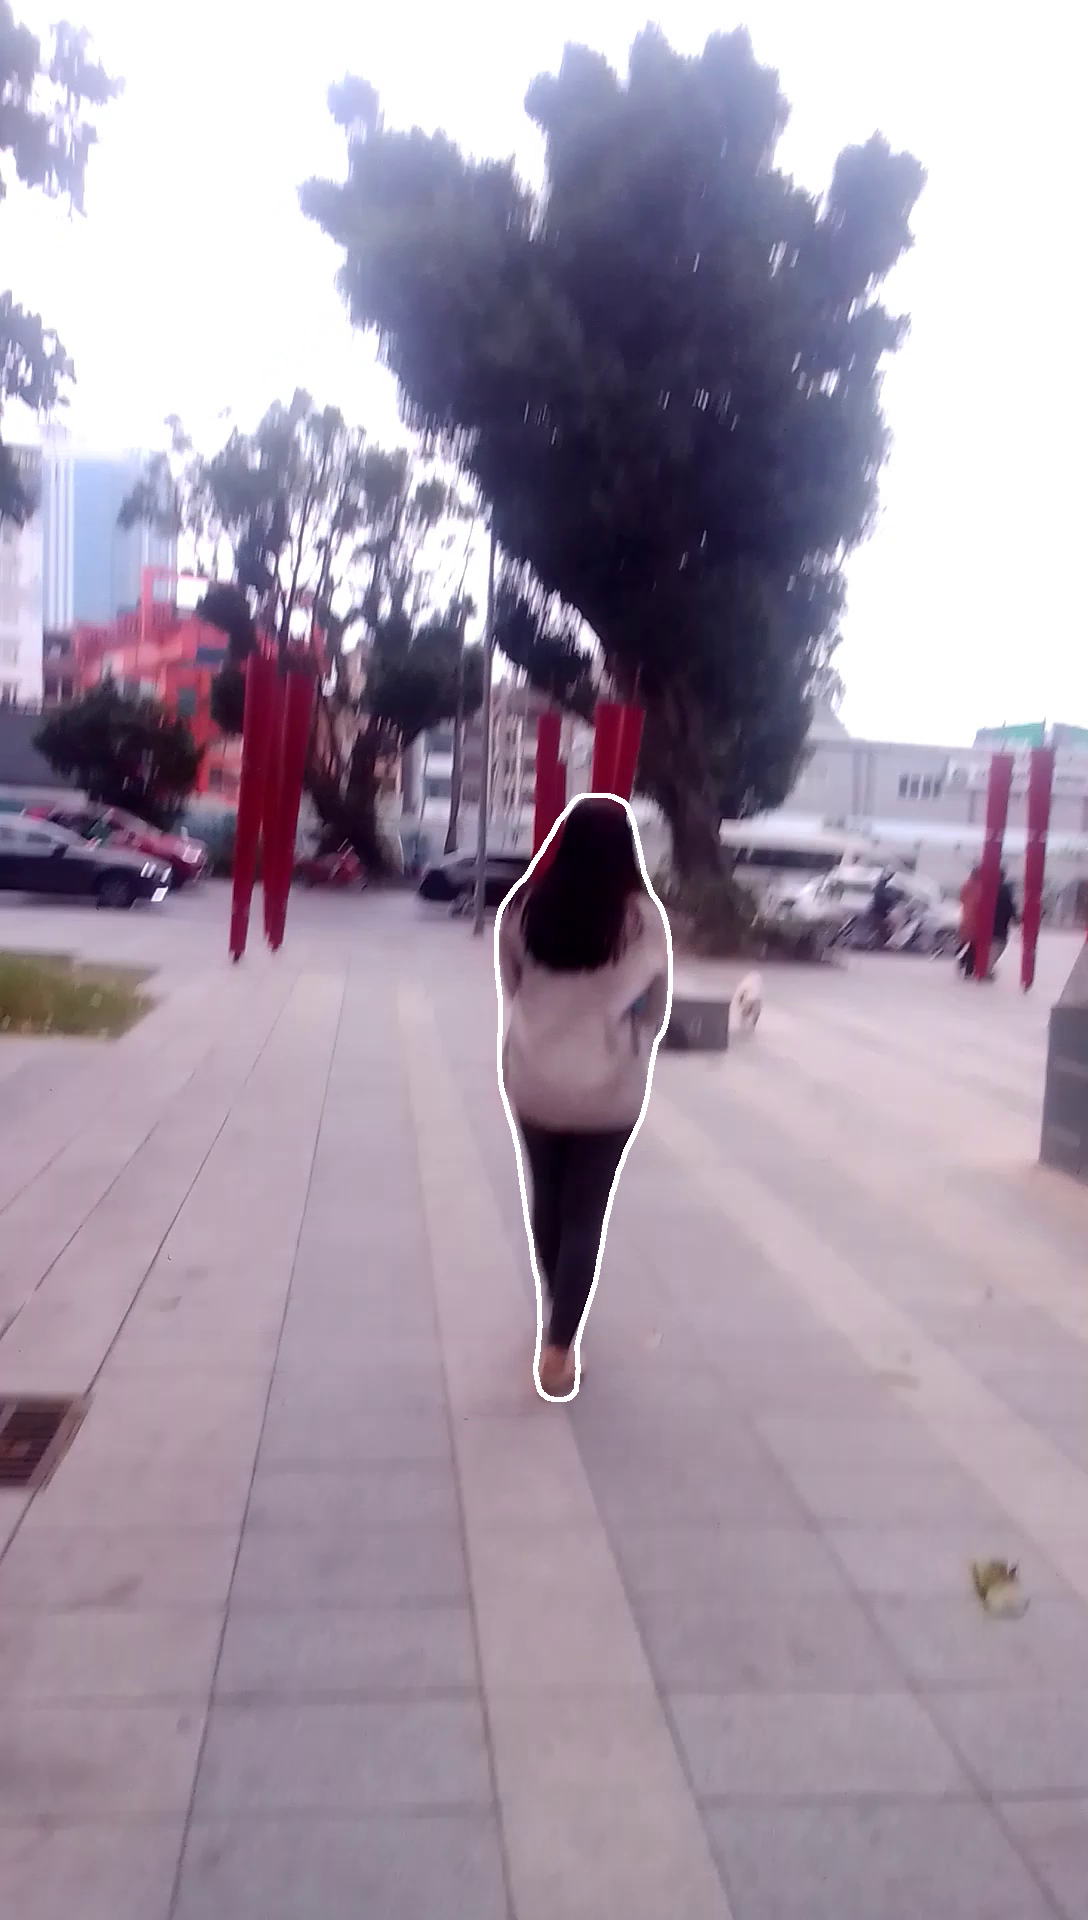

In [15]:
contoured_image = draw.segmentation_contour(
    contour_pixels = contours, 
    contour_color = "#ffffff",
    contour_size=2,
    font="/content/drive/MyDrive/Body_Matrix/Roboto-Bold.ttf", 
    image=sample_frame
)

contoured_image